In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%pylab inline
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (10,6)})
% matplotlib inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [3]:
#load the data
df = pd.read_csv('cleaned set new.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20060 entries, 0 to 20059
Data columns (total 18 columns):
Unnamed: 0                            20060 non-null int64
Facility Size (sq Ft)                 19602 non-null float64
Revenue (US Dollars, million)         17217 non-null float64
Net Income (US Dollars, million)      17217 non-null float64
Total Employees                       17249 non-null float64
Total Assets (US Dollars, million)    17217 non-null float64
Owns Rents_Owns                       20060 non-null int64
Importer                              20060 non-null int64
Exporter                              20060 non-null int64
Manufacturing                         20060 non-null int64
Women Owned                           20060 non-null int64
Minority Owned                        20060 non-null int64
RevPerEm                              16856 non-null float64
RevPerSq                              16821 non-null float64
SqPerEm                               16844 non-nul

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16468 entries, 0 to 20018
Data columns (total 18 columns):
Unnamed: 0                            16468 non-null int64
Facility Size (sq Ft)                 16468 non-null float64
Revenue (US Dollars, million)         16468 non-null float64
Net Income (US Dollars, million)      16468 non-null float64
Total Employees                       16468 non-null float64
Total Assets (US Dollars, million)    16468 non-null float64
Owns Rents_Owns                       16468 non-null int64
Importer                              16468 non-null int64
Exporter                              16468 non-null int64
Manufacturing                         16468 non-null int64
Women Owned                           16468 non-null int64
Minority Owned                        16468 non-null int64
RevPerEm                              16468 non-null float64
RevPerSq                              16468 non-null float64
SqPerEm                               16468 non-nul

In [7]:
#splitting into features and target
y = df['Exporter']
X = df[['Importer', 'Manufacturing','RevPerEm', 'RevPerSq', 'Owns Rents_Owns']]

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6132    1]
 [ 454    1]]
             precision    recall  f1-score   support

          0       0.93      1.00      0.96      6133
          1       0.50      0.00      0.00       455

avg / total       0.90      0.93      0.90      6588



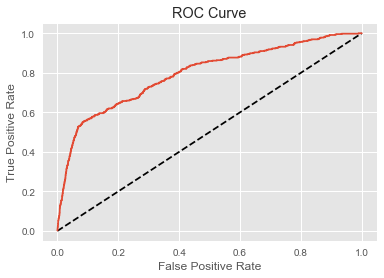

In [9]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.7941958742382679
AUC scores computed using 5-fold cross-validation: [ 0.82337555  0.8282049   0.78742601  0.79705181  0.75578277]


In [11]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [12]:
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.9294996356570319


In [13]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state= 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid,cv = 5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 3.7275937203149381, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.9281376518218624


## Looking for improvement with log features

After tuning the 'C' and 'penalty' parameters, and using the features of Revenue per Employee, Revenue per Sq Ft, Importer, Manufacturer, and Own vs Rent, the model can predict whether a company will export with an accuracy of about 93%. That's pretty good, but the log comparisions showed even stronger Cohen's D, so let's try those and see what happens.

In [14]:
#splitting into features and target
y = df['Exporter']
X = df[['Importer', 'Manufacturing','LogRpE', 'LogRpF', 'Owns Rents_Owns']]

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6093   40]
 [ 392   63]]
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      6133
          1       0.61      0.14      0.23       455

avg / total       0.92      0.93      0.91      6588



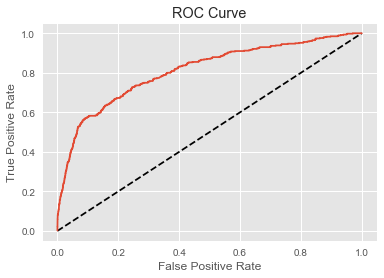

In [16]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.809963035497032
AUC scores computed using 5-fold cross-validation: [ 0.83340174  0.84572     0.78565388  0.80416491  0.78128419]


In [18]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [19]:
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.43939705607607948}
Best score is 0.9330823415108088


In [20]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state= 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid,cv = 5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 268.26957952797272, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.9328947368421052


This does show a slight improvement over the non-log features. But every little bit helps.

### Trying additional methods

#### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_probs = RF.predict_proba(X_test)
logloss = log_loss(y_test, RF_probs)

In [22]:
logloss

1.0832331100238961

In [23]:
RF.score(X_test, y_test)

0.9193989071038251

In [24]:
RF.n_features_

5

In [25]:
X_train1, y_train1 = X_train[:900], y_train[:900]
X_train2, y_train2 = X_train[900:], y_train[900:]

In [26]:
# Setup the hyperparameter grid
n_est = np.linspace(1,25,25).astype(int)
param_grid = {'n_estimators': n_est}
# Instantiate a logistic regression classifier: logreg
RF = RandomForestClassifier()

# Instantiate the GridSearchCV object: logreg_cv
RF_cv = GridSearchCV(RF, param_grid, cv=5)

# Fit it to the data
RF_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(RF_cv.best_params_)) 
print("Best score is {}".format(RF_cv.best_score_))

Tuned Logistic Regression Parameters: {'n_estimators': 2}
Best score is 0.9216662618411464


In [27]:
clf = RandomForestClassifier(n_estimators = 20)
clf.fit(X_train1, y_train1)
clf_probs = clf.predict_proba(X_test)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
sig_clf.fit(X_train2, y_train2)
sig_clf_probs = sig_clf.predict_proba(X_test)
sig_score = log_loss(y_test, sig_clf_probs)

In [28]:
sig_score

0.22455950043082676

In [29]:
sig_clf.score(X_test, y_test)

0.93017607771706134

It looks life the best Random Forest can get is 93% accuracy.

In [47]:
clf.feature_importances_

array([ 0.10436132,  0.0265117 ,  0.39938205,  0.44034517,  0.02939975])

The productivity measures were the most important features of this particular model.

#### XGBoost

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [34]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.17%


In [48]:
model.feature_importances_

array([ 0.07872697,  0.05695142,  0.38525963,  0.44723618,  0.0318258 ], dtype=float32)

Again, the comparision between revenue and facility and employees were the most significant measures.

#### GBM


In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search


# Create the hyperparameter grid

param_grid = {'n_estimators':np.linspace(20,40,2).astype(int)}

# Instantiate the logistic regression classifier: logreg
GBM = GradientBoostingClassifier(learning_rate=0.05)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state= 42)

# Instantiate the GridSearchCV object: logreg_cv
GBM_cv = GridSearchCV(GBM, param_grid,cv = 5)

# Fit it to the training data
GBM_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned GBM Parameter: {}".format(GBM_cv.best_params_))
print("Tuned GBM Accuracy: {}".format(GBM_cv.best_score_))


Tuned GBM Parameter: {'n_estimators': 40}
Tuned GBM Accuracy: 0.9323886639676113


In [42]:
GBM_tuned = GradientBoostingClassifier(learning_rate =.05, n_estimators = 40)

In [43]:
GBM_tuned.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=40, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [44]:
GBM_tuned.feature_importances_

array([ 0.66427699,  0.0035894 ,  0.15663279,  0.16695693,  0.0085439 ])

Here whether a company was an importer was the most dominant feature, with the productivity measures providing the remainder of the prediction.

## Conclusion

The logistic regression using the log-transformed data was the most accurate at 93.3%, but all the other models were similar. GBM was the next closest and perhaps with additional optimization it could exceed the logistic regression. In any case, it appears that around 93% accuracy is what these features produce. Perhaps additional features are needed. But, it is worth considering that those misses may indicate companies that are ready to begin exporting and attention could be focused there.